# Model Selection 
It is the process of choosing the best suited model for a particular problem.Selecting a model depends on various factors such as the dataset,task , nature of the model etc
### Two factors to be considered : 
1. Logical Reason to select a model
2. Comparing the performance of the model

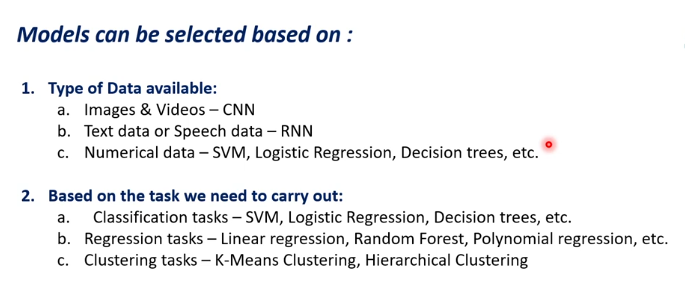


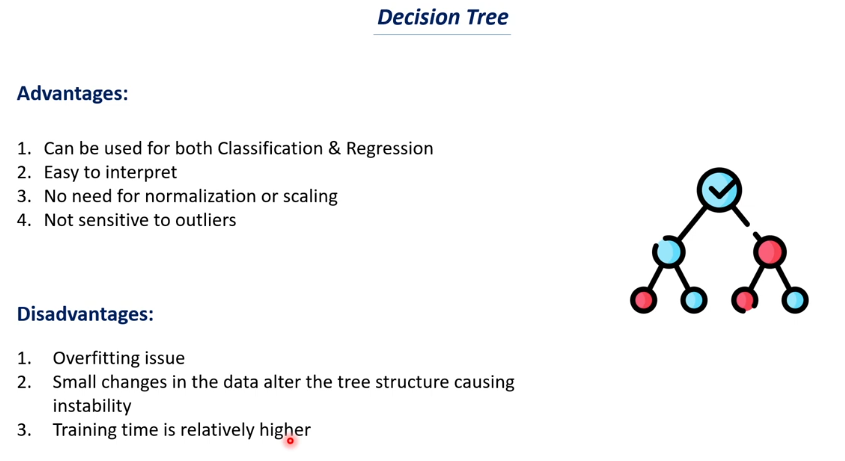

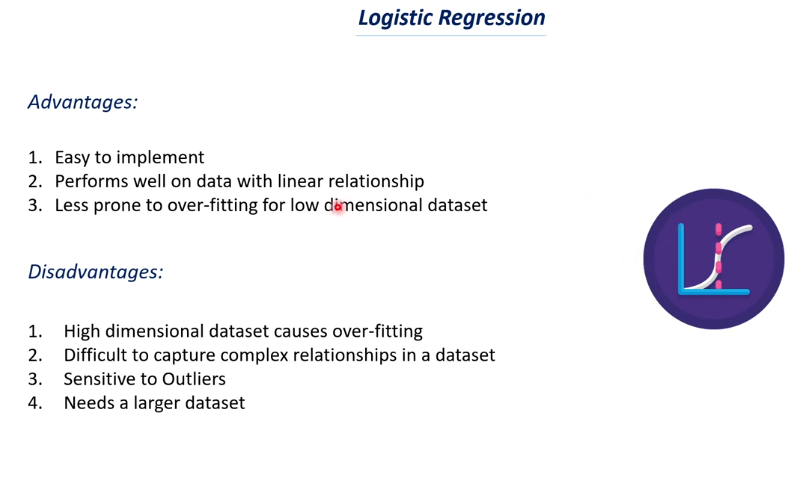

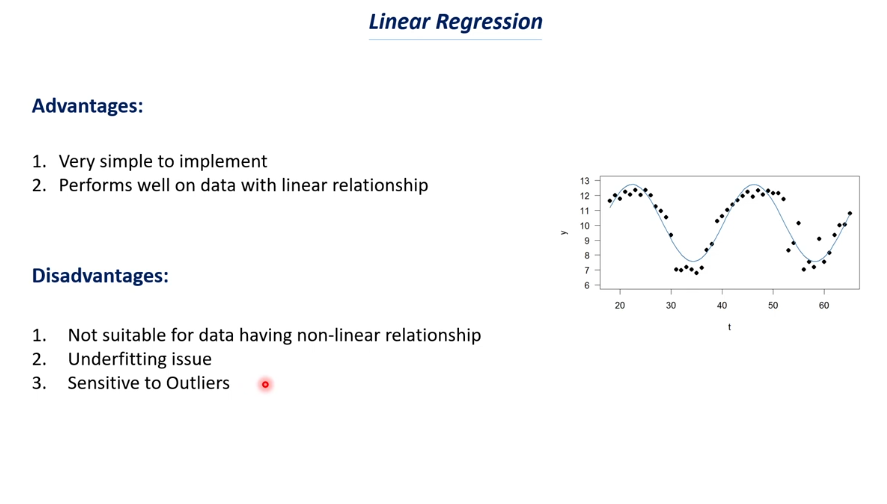

# Model selection for ML

In [1]:
# importing the library 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv(r"C:\Users\utkar\100 days ML\Heart Disease Prediction\heart_disease_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# cheching the shape of the data
data.shape

(303, 14)

In [5]:
# checking the null values 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# checking the distribution of Target Variable 
data['target'].value_counts()   # 1 for non-healthy and 0 for healthy

target
1    165
0    138
Name: count, dtype: int64

In [7]:
# splitting the features and target 
x = data.drop(columns = 'target', axis = 1)
y = data['target']

In [8]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [9]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [10]:
# convering into numpy array
x = np.asarray(x)
y = np.asarray(y)

# comparing the models with default hyperparameter values using Cross Validation 

In [11]:
# list of model 
models = [LogisticRegression(max_iter = 1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(random_state = 0)]

In [60]:
def compar_models_cross():
    for model in models :
        cv_score = cross_val_score(model, x,y ,cv = 5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy, 2)

        print('Cross Validation accuarcy for the ',model,'=',cv_score)
        print('Accuracy score of the ',model,'=', mean_accuracy,'%')
        print('__')    

In [61]:
compar_models_cross()

C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validation accuarcy for the  LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy score of the  LogisticRegression(max_iter=1000) = 82.83 %
__
Cross Validation accuarcy for the  SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy score of the  SVC(kernel='linear') = 82.83 %
__
Cross Validation accuarcy for the  KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy score of the  KNeighborsClassifier() = 64.39 %
__
Cross Validation accuarcy for the  RandomForestClassifier(random_state=0) = [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Accuracy score of the  RandomForestClassifier(random_state=0) = 83.81 %
__


In [41]:
# Doing hyperparameter 
models_list = [LogisticRegression(max_iter = 1000),SVC(),KNeighborsClassifier(),RandomForestClassifier(random_state = 0)]

In [62]:
# Crating the dictionary values for he above mentioned model
model_hyperparameters ={
    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [63]:
type(model_hyperparameters)


dict

In [64]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [65]:
print(model_hyperparameters.values())

dict_values([{'C': [1, 5, 10, 20]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'n_estimators': [10, 20, 50, 100]}])


In [67]:
# converting the models keys into the list 
model_hyperparameters['log_reg_hyperparameters']

{'C': [1, 5, 10, 20]}

In [68]:
model_keys = list(model_hyperparameters.keys())

In [69]:
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [70]:
model_keys[0]

'log_reg_hyperparameters'

In [71]:
model_keys[2]

'KNN_hyperparameters'

In [72]:
model_hyperparameters[model_keys[0]]

{'C': [1, 5, 10, 20]}

In [73]:
model_hyperparameters[model_keys[1]]

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [76]:
# Applying the GridSearchCV
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(x,y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe
        

In [77]:
ModelSelection(models_list,model_hyperparameters)

LogisticRegression(max_iter=1000)
{'C': [1, 5, 10, 20]}
---------------------------------


C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=1000),0.831585,{'C': 5}
1,SVC(),0.828306,"{'C': 1, 'kernel': 'linear'}"
2,KNeighborsClassifier(),0.643880,{'n_neighbors': 5}
3,RandomForestClassifier(random_state=0),0.838087,{'n_estimators': 100}
